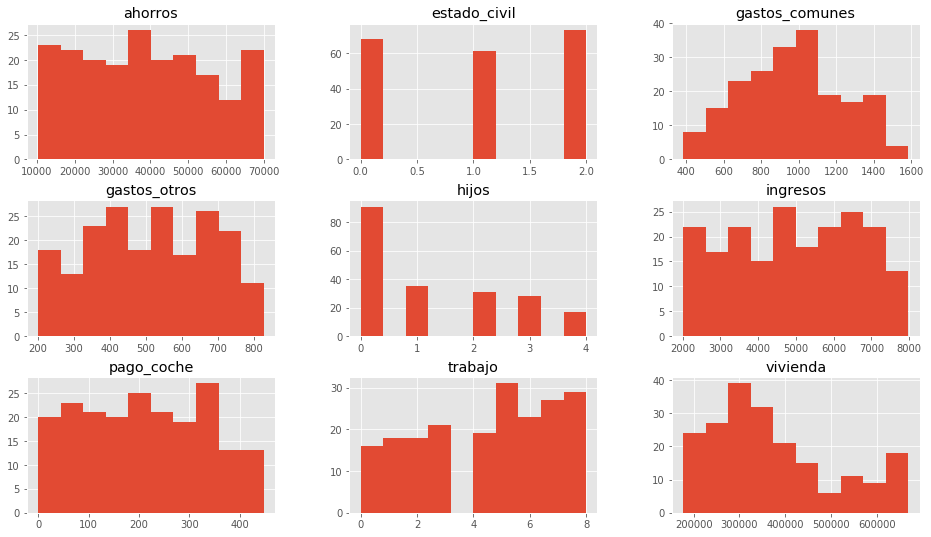

comprar
0    135
1     67
dtype: int64
Index(['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar'], dtype='object')
Precisión en el set de Entrenamiento:	 0.87
Precisión en el set de Test:		 0.90
PREDICCION: 
[0 1]


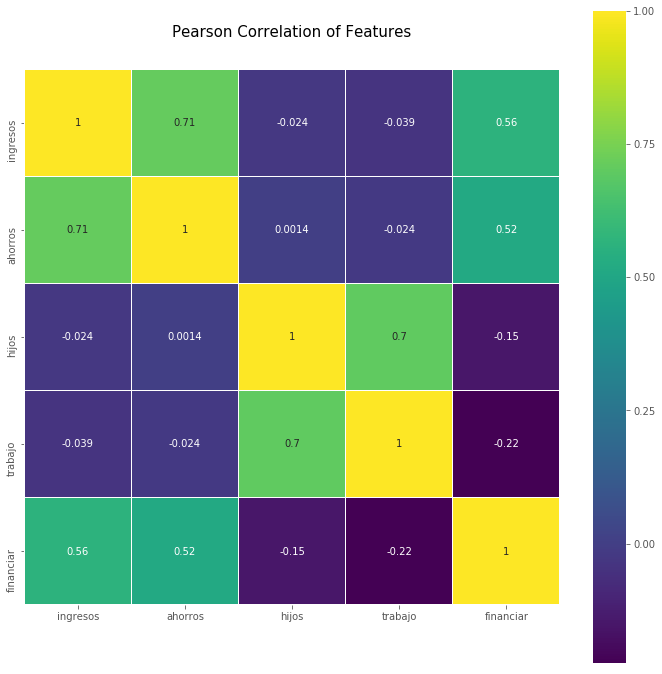

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

#cargamos los datos de entrada
dataframe = pd.read_csv("./comprar_alquilar.csv")
#veamos cuantas dimensiones y registros contiene
dataframe.shape
dataframe.drop(['comprar'],1).hist()
plt.show()
print(dataframe.groupby('comprar').size())


dataframe['gastos']=(dataframe['gastos_comunes']
                     +dataframe['gastos_otros']
                     +dataframe['pago_coche'])
dataframe['financiar']=dataframe['vivienda']-dataframe['ahorros']
#dataframe.drop(['gastos_comunes','gastos_otros','pago_coche'], axis=1).head(10)

reduced = dataframe.drop(['gastos_comunes','gastos_otros','pago_coche'], axis=1)
reduced.describe

X=dataframe.drop(['comprar'], axis=1)
y=dataframe['comprar']

best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

used_features =X.columns[selected]

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(dataframe[used_features]
           .astype(float)
           .corr()
           ,linewidths=0.1
           ,vmax=1.0
           , square=True
           , cmap=colormap
           , linecolor='white'
           , annot=True)


# Split dataset in training and test datasets
X_train, X_test = train_test_split(dataframe, test_size=0.2, random_state=6) 
y_train =X_train["comprar"]
y_test = X_test["comprar"]


# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train[used_features].values,
    y_train
)
y_pred = gnb.predict(X_test[used_features])

print('Precisión en el set de Entrenamiento:\t {:.2f}'
     .format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test:\t\t {:.2f}'
     .format(gnb.score(X_test[used_features], y_test)))
#                 ['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar']
print('PREDICCION: ')
print(gnb.predict([[2000,        5000,     0,       5,         200000],
                   [6000,        34000,    2,       5,         320000] ]))
#Resultado esperado 0-Alquilar, 1-Comprar casa